In [397]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.style as style

Illinois State University

DoE

NCES

In [381]:
def fix_state_name(state):
    for i in range(len(state)):
        if state[i] == '.':
            return state[:i].strip()
    return state

def get_net_data(df_list):    
    years = ["1994", "1996", "2004", "2008", "2012", "2014"]
    
    column_names = ["STATE", "FIRST_TIME_ENROLLMENT", 
                    "ENROLLED_IN_ANY", "ENROLLED_IN_HOME",
                    "RATIO_IN_STATE_TO_FIRST_TIME",
                    "RATIO_IN_STATE_TO_ANY_STATE", "MIGRATION_IN",
                    "MIGRATION_OUT", "MIGRATION_NET"]
    
    for df in df_list:
        del df["Unnamed: 4"]
        df.columns = column_names
        df.loc[:,"STATE"] = df.loc[:,"STATE"].apply(fix_state_name)
    
    state_names = list(df_list[0].STATE.unique())
    
    df_net_list = [df[["STATE","MIGRATION_NET"]] for df in df_list]

    df_net = pd.DataFrame(index=years, columns=state_names)

    for i in range(len(df_net_list)):
        for state in state_names:
            df_net.at[years[i], state] = float(df_net_list[i].loc[df_net_list[i]["STATE"] == state]["MIGRATION_NET"])

    df_net['Year'] = pd.to_numeric(df_net.index)
    df_net.index = list([i for i in range(len(years))])

    for state in state_names:
        df_net[state] = pd.to_numeric(df_net[state])

    cols = df_net.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    df_net = df_net[cols]
    
    return df_net

In [384]:
years = ["1994", "1996", "2004", "2008", "2012", "2014"]

df_list = [pd.read_csv("EducationData" + year + ".csv") for year in years]

df_funding = pd.read_csv("StateFunding2008-2016.csv")
df_net = get_net_data(df_list)

Type: <class 'matplotlib.axes._subplots.AxesSubplot'>


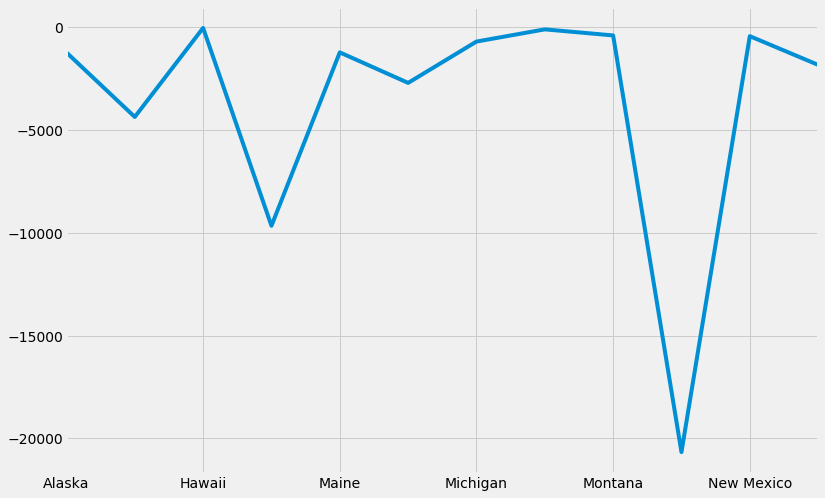

In [398]:
net_enter = df_net.loc[0, df_net.loc[0] < 0]
net_enter.head()
style.use('fivethirtyeight')
net_enter_plot = net_enter.plot(x = 'Year', y = net_enter.index, figsize = (12,8))
print("Type:", type(net_enter_plot))

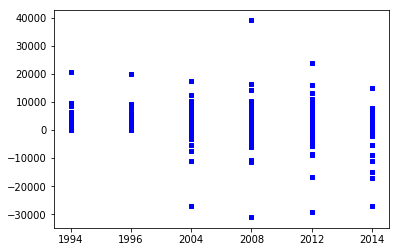

In [260]:
# extraticks = [1998, 2000, 2002, 2006]

# fig, axes = plt.subplots(nrows=51, ncols=1, figsize=(8,8))

# plt.scatter(years, [df.loc[df["STATE"] == "Alabama"]["MIGRATION_NET"] for df in df_list])
# plt.xticks(list(plt.xticks()[0]) + extraticks)

state_names = list(df_list[0].STATE.unique())

fig = plt.figure()
ax1 = fig.add_subplot(111)
for state in state_names:
#     print(state)
    y = [int(df.loc[df["STATE"] == state]["MIGRATION_NET"]) for df in df_list]
#     print(y)
    ax1.scatter(years, y, s=10, c='b', marker="s", label='')

plt.legend(loc='upper left')
plt.show()